In [3]:
import numpy as np
import pandas as pd
import seaborn as sb

In [9]:
df=pd.read_csv(r'STASTS.csv')

In [11]:
df

,NAME,INCOME
0,ROB,5000
1,RAFIQ,6000
2,NINA,4000
3,SOFIA,7500
4,MOHAN,8000
5,TAO,7000
6,ELON MUSK,1000000


In [13]:
df.describe()

,INCOME
count,7.000000
mean,148214.285714
std,375604.829702
min,4000.000000
25%,5500.000000
50%,7000.000000
75%,7750.000000
max,1000000.000000


In [21]:
#removing outliers with percentile
percentile_99=df.INCOME.quantile(0.99)
percentile_99

940479.9999999995

In [23]:
DF_NO_OUTLIERS=df[df.INCOME<=percentile_99]
DF_NO_OUTLIERS

,NAME,INCOME
0,ROB,5000
1,RAFIQ,6000
2,NINA,4000
3,SOFIA,7500
4,MOHAN,8000
5,TAO,7000


In [29]:
df['INCOME'][3]=np.NaN


In [31]:
df

,NAME,INCOME
0,ROB,5000.0
1,RAFIQ,6000.0
2,NINA,4000.0
3,SOFIA,NaN
4,MOHAN,8000.0
5,TAO,7000.0
6,ELON MUSK,1000000.0


In [33]:
 df.INCOME.mean()

171666.66666666666

In [39]:
df2=df.fillna(df.INCOME.median())
df2

,NAME,INCOME
0,ROB,5000.0
1,RAFIQ,6000.0
2,NINA,4000.0
3,SOFIA,6500.0
4,MOHAN,8000.0
5,TAO,7000.0
6,ELON MUSK,1000000.0


In [49]:
df2['INCOME'].mode()


0       4000.0
1       5000.0
2       6000.0
3       6500.0
4       7000.0
5       8000.0
6    1000000.0
Name: INCOME, dtype: float64

In [53]:
df3=pd.read_csv('AB_NYC_2019.csv')
df3

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [73]:
# checking null values
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [139]:
min_threshold,max_threshold=df3['price'].quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [131]:
df3_no_outlier=df3[df3['price']<=out]
df3_no_outlier

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [7]:
df4=pd.read_csv('bhp.csv')
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [27]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [31]:
df4.shape

(13200, 7)

In [15]:
low_percentile,max_percentile=df4['price_per_sqft'].quantile([0.001,0.999])
low_percentile,max_percentile

(1366.184, 50959.36200000098)

In [35]:
df4_no_outlier=df4[(df4['price_per_sqft']>low_percentile) & (df4['price_per_sqft']<max_percentile)]
df4_no_outlier.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6559,Banaswadi,6 Bedroom,1000.0,4.0,150.0,6,15000
12636,OMBR Layout,5 Bedroom,600.0,3.0,140.0,5,23333
13183,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043
4151,Bommasandra,3 BHK,1478.0,2.0,44.0,3,2976
12534,Sarjapur Road,4 Bedroom,3150.0,4.0,500.0,4,15873
5056,other,2 BHK,1100.0,2.0,55.0,2,5000
1014,Vittasandra,2 BHK,1246.0,2.0,64.5,2,5176
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
4192,other,3 BHK,2000.0,3.0,85.0,3,4250
9888,other,2 BHK,1130.0,2.0,68.0,2,6017


In [77]:
df4.shape[0]-df4_no_outlier.shape[0] # 28 outliers removed

28

<Axes: xlabel='price_per_sqft', ylabel='Count'>

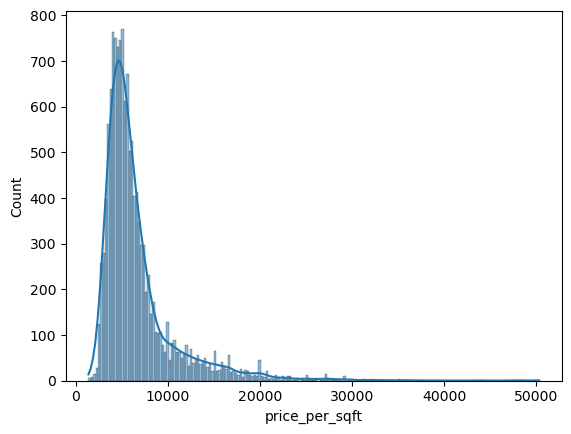

In [39]:
sb.histplot(x=df4_no_outlier['price_per_sqft'],kde=True)

In [59]:
max_nrml=df4_no_outlier["price_per_sqft"].mean()+4*(df4_no_outlier["price_per_sqft"].std())
min_nrml=df4_no_outlier["price_per_sqft"].mean()-4*(df4_no_outlier["price_per_sqft"].std())
max_nrml,min_nrml

(23227.73653589429, -9900.429065502549)

In [61]:
df5=df4_no_outlier[(df4_no_outlier["price_per_sqft"]>min_nrml) & (df4_no_outlier["price_per_sqft"]<max_nrml)]
df5.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
10761,Subramanyapura,2 BHK,929.0,1.0,51.00,2,5489
12740,Vidyaranyapura,2 BHK,1200.0,2.0,42.00,2,3500
2882,Thanisandra,2 BHK,1185.5,2.0,58.68,2,4949
6939,Hebbal,3 BHK,1645.0,3.0,117.00,3,7112
3996,Kudlu Gate,3 BHK,1532.0,3.0,83.00,3,5417
9571,Kengeri,2 BHK,1200.0,2.0,42.00,2,3500
7992,Harlur,2 BHK,1303.0,2.0,90.00,2,6907
11059,ISRO Layout,2 BHK,1200.0,2.0,43.00,2,3583
4695,Tumkur Road,3 BHK,1789.0,3.0,98.00,3,5477
9553,other,6 Bedroom,1508.0,5.0,240.00,6,15915


In [75]:
df4_no_outlier.shape[0]-df5.shape[0] #125 outliers more removed

125

<Axes: xlabel='price_per_sqft', ylabel='Count'>

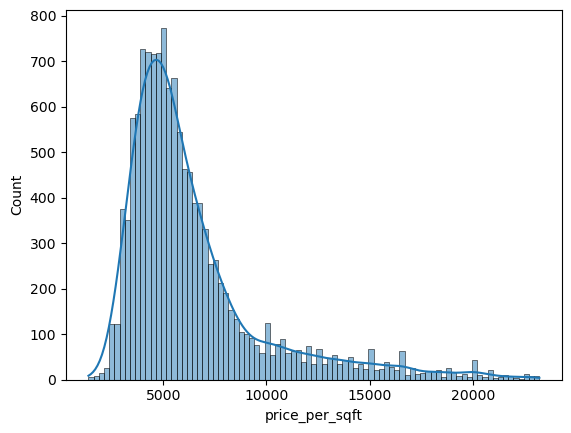

In [79]:
sb.histplot(x=df5['price_per_sqft'],kde=True)

In [97]:
df5['zscore'] = (df5.price_per_sqft-df5.price_per_sqft.mean())/df5.price_per_sqft.std()
df5.sample(10)

C:\Users\suruk\AppData\Local\Temp\ipykernel_14928\3303647160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['zscore'] = (df5.price_per_sqft-df5.price_per_sqft.mean())/df5.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score,zscore
10280,other,3 BHK,1555.0,2.0,67.0,3,4308,-0.613971,-0.613971
10311,Thanisandra,3 BHK,1262.0,2.0,65.0,3,5150,-0.372549,-0.372549
5849,other,2 BHK,1035.0,2.0,44.0,2,4251,-0.630314,-0.630314
10842,Green Glen Layout,3 BHK,1740.0,3.0,80.0,3,4597,-0.531108,-0.531108
9263,other,2 BHK,1320.0,2.0,90.0,2,6818,0.105707,0.105707
10935,other,7 BHK,3000.0,6.0,180.0,7,6000,-0.128833,-0.128833
10498,Kalyan nagar,2 BHK,1100.0,2.0,70.0,2,6363,-0.024752,-0.024752
3643,other,2 BHK,902.0,2.0,42.0,2,4656,-0.514191,-0.514191
293,TC Palaya,3 Bedroom,1475.0,3.0,98.0,3,6644,0.055817,0.055817
11022,KR Puram,2 BHK,1204.0,2.0,58.0,2,4817,-0.468028,-0.468028


In [99]:
df6=df5[(df5['z_score']> -4 ) & (df5['z_score']< 4)]
df6.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score,zscore
5401,Vittasandra,2 BHK,1246.0,2.0,65.40,2,5248,-0.344450,-0.344450
153,Electronic City Phase II,2 BHK,1020.0,2.0,30.60,2,3000,-0.989006,-0.989006
74,Kothannur,2 BHK,1206.0,2.0,48.23,2,3999,-0.702569,-0.702569
9771,Sahakara Nagar,2 BHK,1180.0,2.0,72.00,2,6101,-0.099874,-0.099874
11795,5th Block Hbr Layout,6 BHK,5100.0,5.0,300.00,6,5882,-0.162667,-0.162667
6258,Brookefield,3 BHK,1410.0,2.0,80.00,3,5673,-0.222592,-0.222592
8581,other,3 BHK,1640.0,3.0,70.00,3,4268,-0.625440,-0.625440
7516,other,8 BHK,3000.0,4.0,130.00,8,4333,-0.606803,-0.606803
3767,Hebbal,2 BHK,1320.0,2.0,92.00,2,6969,0.149003,0.149003
1334,other,7 Bedroom,5000.0,7.0,299.00,7,5980,-0.134568,-0.134568


In [101]:
df5.shape[0]-df6.shape[0]

86

<Axes: xlabel='price_per_sqft', ylabel='Count'>

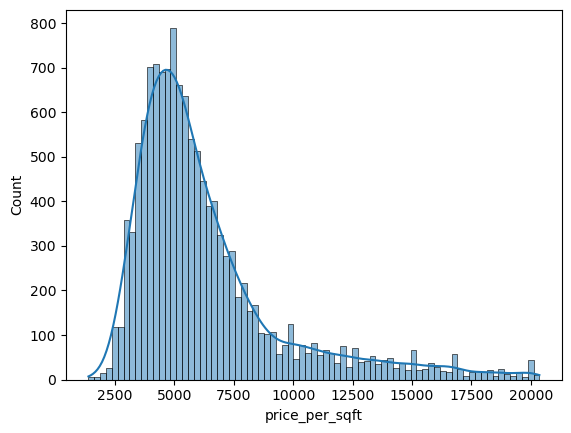

In [103]:
sb.histplot(x=df6['price_per_sqft'],kde=True)